In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import matplotlib.cm as cm

In [ ]:
#membaca data
kendaraan = pd.read_csv('kendaraan_train.csv')
kendaraan

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
#Mencari dan menghitung data null
kendaraan.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
#menampilkan jenis info data kendaraan
kendaraan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
#Mengisi data (null) float64 dan integer dengan mean datanya
#Mengisi data (null) object dengan modus datanya

kendaraan ['Jenis_Kelamin'].fillna(kendaraan['Jenis_Kelamin'].mode()[0], inplace=True)
kendaraan ['Umur'].fillna(kendaraan['Umur'].mean(), inplace=True)
kendaraan ['SIM'].fillna(kendaraan['SIM'].mean(), inplace=True)
kendaraan ['Kode_Daerah'].fillna(kendaraan['Kode_Daerah'].mean(), inplace=True)
kendaraan ['Sudah_Asuransi'].fillna(kendaraan['Sudah_Asuransi'].mean(), inplace=True)
kendaraan ['Umur_Kendaraan'].fillna(kendaraan['Umur_Kendaraan'].mode()[0], inplace=True)
kendaraan ['Kendaraan_Rusak'].fillna(kendaraan['Kendaraan_Rusak'].mode()[0], inplace=True)
kendaraan ['Premi'].fillna(kendaraan['Premi'].mean(), inplace=True)
kendaraan ['Kanal_Penjualan'].fillna(kendaraan['Kanal_Penjualan'].mean(), inplace=True)
kendaraan ['Lama_Berlangganan'].fillna(kendaraan['Lama_Berlangganan'].mean(), inplace=True)

In [ ]:
#Menampilkan data setelah mengolah data
kendaraan.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
#mengolah data dengan membagi classnya
kendaraan = pd.get_dummies(kendaraan).astype('float64')
kendaraan.head()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun,Kendaraan_Rusak_Pernah,Kendaraan_Rusak_Tidak
0,1.0,30.0,1.0,33.0,1.0,28029.0,152.0,97.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,48.0,1.0,39.0,0.0,25800.0,29.0,158.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,3.0,21.0,1.0,46.0,1.0,32733.0,160.0,119.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4.0,58.0,1.0,48.0,0.0,2630.0,124.0,63.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,5.0,50.0,1.0,35.0,0.0,34857.0,88.0,194.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
#menampilkan data 
kendaraan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        285831 non-null  float64
 1   Umur                      285831 non-null  float64
 2   SIM                       285831 non-null  float64
 3   Kode_Daerah               285831 non-null  float64
 4   Sudah_Asuransi            285831 non-null  float64
 5   Premi                     285831 non-null  float64
 6   Kanal_Penjualan           285831 non-null  float64
 7   Lama_Berlangganan         285831 non-null  float64
 8   Tertarik                  285831 non-null  float64
 9   Jenis_Kelamin_Pria        285831 non-null  float64
 10  Jenis_Kelamin_Wanita      285831 non-null  float64
 11  Umur_Kendaraan_1-2 Tahun  285831 non-null  float64
 12  Umur_Kendaraan_< 1 Tahun  285831 non-null  float64
 13  Umur_Kendaraan_> 2 Tahun  285831 non-null  f

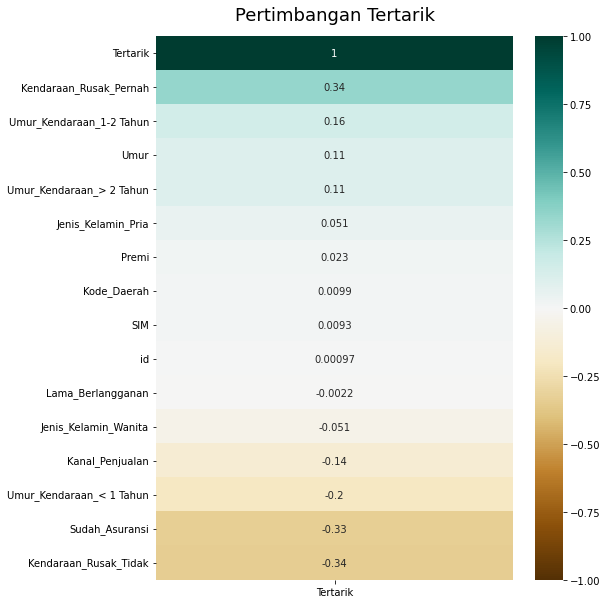

In [ ]:
#Menampilkan data heatmap dari data kendaraan
plt.figure(figsize = (8, 10))
heatmap = sns.heatmap(kendaraan.corr()[['Tertarik']].sort_values(by='Tertarik', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Pertimbangan Tertarik', fontdict={'fontsize':18}, pad=16);

In [ ]:
#Data frame
testdata = kendaraan[["Tertarik","Umur","Umur_Kendaraan_1-2 Tahun","Kendaraan_Rusak_Pernah"]]
testdata.head()

,Tertarik,Umur,Umur_Kendaraan_1-2 Tahun,Kendaraan_Rusak_Pernah
0,0.0,30.0,0.0,0.0
1,0.0,48.0,0.0,1.0
2,0.0,21.0,0.0,0.0
3,0.0,58.0,1.0,0.0
4,0.0,50.0,0.0,1.0


In [ ]:
#Menampilkan test data di atas
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Tertarik                  285831 non-null  float64
 1   Umur                      285831 non-null  float64
 2   Umur_Kendaraan_1-2 Tahun  285831 non-null  float64
 3   Kendaraan_Rusak_Pernah    285831 non-null  float64
dtypes: float64(4)
memory usage: 8.7 MB


In [ ]:
fitur1 = np.array(testdata[['Tertarik','Umur']])
fitur1

array([[ 0., 30.],
       [ 0., 48.],
       [ 0., 21.],
       ...,
       [ 0., 23.],
       [ 0., 68.],
       [ 0., 45.]])

In [ ]:
fitur2 = np.array(testdata[['Tertarik', 'Umur_Kendaraan_1-2 Tahun']])

In [ ]:
fitur3 = np.array(testdata[['Tertarik','Kendaraan_Rusak_Pernah']])

In [ ]:
fulldata = np.array(testdata[['Umur','Umur_Kendaraan_1-2 Tahun','Kendaraan_Rusak_Pernah']])
labeldata = np.array(testdata[['Tertarik']])

Plot 3D


Text(0.5, 0, 'Umur')

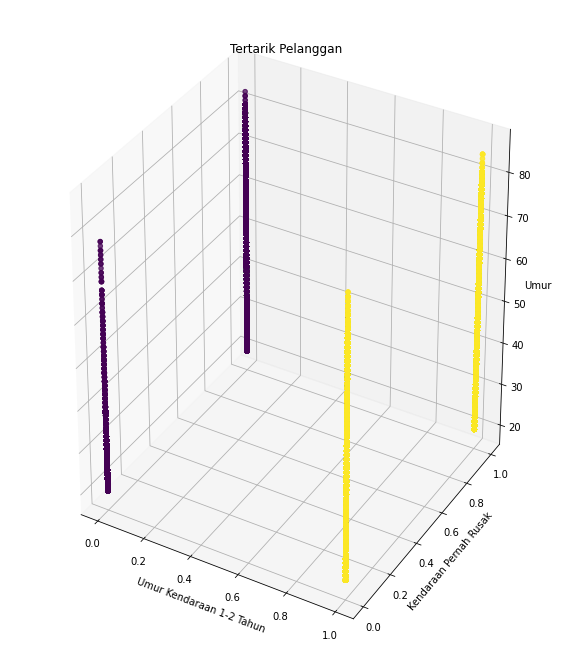

In [ ]:
#Menampilkan data dalam bentuk plot 3D
plot = plt.figure(figsize = (10, 12))
ax = plot.add_subplot(projection='3d')
xs = [x[1]for x in fulldata]
ys = [x[2]for x in fulldata]
zs = [x[0]for x in fulldata]

ax.scatter(xs, ys, zs, c =xs, cmap='viridis')
print(f'Plot 3D')

ax.set_title("Tertarik Pelanggan")
ax.set_xlabel('Umur Kendaraan 1-2 Tahun')
ax.set_ylabel('Kendaraan Pernah Rusak')
ax.set_zlabel('Umur')

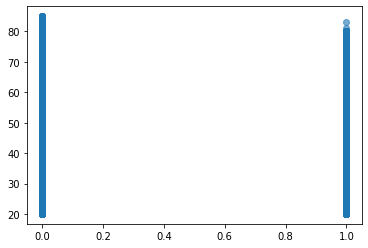

In [ ]:
#Distribusi antara Umur dan Tertarik
plt.scatter(fitur1[:, 0], fitur1[:, 1], alpha=0.6)
plt.show()

In [ ]:
#mencari nilai terbaik dengan kmeans
def kmeans(a,k, iter):
    index = np.random.choice(len(a), k, replace=False)
 
    centroids = a[index, :]

    distances = cdist(a, centroids ,'euclidean')

    points = np.array([np.argmin(i) for i in distances])
    
    for _ in range(iter): 
        centroids = []
        for index in range(k):
          
            temp_cent = a[points==index].mean(axis=0) 
            centroids.append(temp_cent)
        centroids = np.vstack(centroids)
        distances = cdist(a, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
    return points,centroids

minmax=MinMaxScaler()
pca = PCA(2)

In [ ]:
#Membuat plot scatter
def tampilin(data):
  df1 = minmax.fit_transform(data)
  df = pca.fit_transform(df1)
  label, centroid = kmeans(df,2,10)
  u_labels = np.unique(label)
  color=np.arange(110510)
  for i in u_labels:
      for k in range(len(centroid)):
        plt.scatter(centroid[k][0],centroid[k][1], zorder=2, color="purple")
      plt.scatter(df[label == i , 0] , df[label == i , 1] , alpha=.5, label = i)
  plt.legend()
  plt.show()
  return label

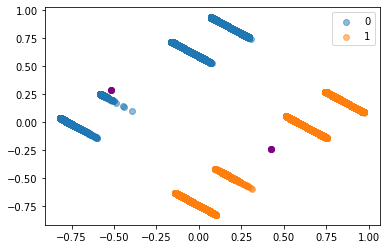

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
tampilin(testdata)

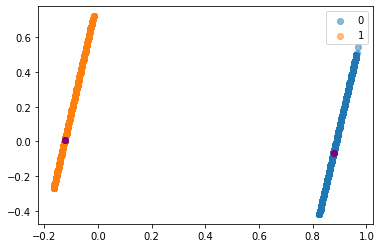

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
tampilin(fitur1)

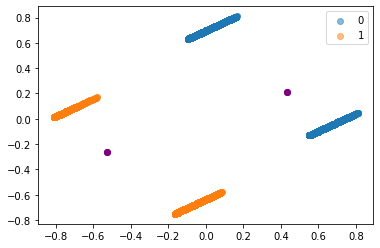

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
tampilin(fulldata)

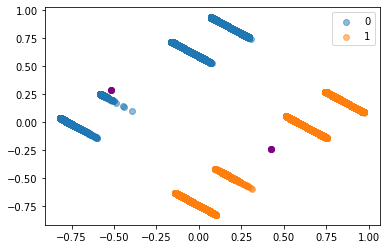

In [ ]:
data_akhir=kendaraan
data_akhir['Clusters']=tampilin(testdata)
data_akhir.to_csv(r'kendaraan_train_akhir.csv')

In [ ]:
data_akhir = pd.read_csv('kendaraan_train_akhir.csv')
data_akhir

,Unnamed: 0,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun,Kendaraan_Rusak_Pernah,Kendaraan_Rusak_Tidak,Clusters
0,0,1.0,30.0,1.0,33.0,1.0,28029.0,152.0,97.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
1,1,2.0,48.0,1.0,39.0,0.0,25800.0,29.0,158.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,2,3.0,21.0,1.0,46.0,1.0,32733.0,160.0,119.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,3,4.0,58.0,1.0,48.0,0.0,2630.0,124.0,63.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1
4,4,5.0,50.0,1.0,35.0,0.0,34857.0,88.0,194.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285826,285827.0,23.0,1.0,4.0,1.0,25988.0,152.0,217.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
285827,285827,285828.0,21.0,1.0,46.0,1.0,44686.0,152.0,50.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
285828,285828,285829.0,23.0,1.0,50.0,1.0,49751.0,152.0,226.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
285829,285829,285830.0,68.0,1.0,7.0,1.0,30503.0,124.0,270.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1


In [ ]:
kendaraan.to_csv(r'kendaraan_pembagian_class.csv')
testdata.to_csv(r'Testdata.csv')
data_akhir.to_csv(r'kendaraan_train_akhir.csv')